Graphs the distribution of error (% of nan) values for various subsets of the dyed rats videos / sleap models. Also graphs the distribution after high velocity outliers are taken out and after corrections have been applied.

## setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dyed_preds_df.csv")

In [10]:
color_pairs = df['color pair'].unique()
nan_cutoff = 0.2 # 0.3

In [15]:
def percent_good(df):
    try:
        # prec = round((df[df['correct'] == True].shape[0] / df.shape[0]) * 100, 3)
        prec = round((df[df['initial nan'] < nan_cutoff].shape[0] / df.shape[0]) * 100, 3)
        print(f"{prec}% of videos were corrected")
    except:
        print("can't find percent of video corrected")

In [5]:
def graph_error(df, title="", colors=('tab:red', 'tab:blue', 'tab:green')):
    corrected_df = df[df['correct'] == True]
    bins = np.histogram(np.hstack((df['initial nan'], df['vel nan'], corrected_df['final nan'])), bins=40)[1] # Get the bin edges
    
    z = plt.hist(corrected_df['final nan'], bins=bins, alpha=0.7, color=colors[2], label='corrected')
    x = plt.hist(df['initial nan'], bins=bins, alpha=0.7, color=colors[0], label='initial')
    y = plt.hist(df['vel nan'], bins=bins, alpha=0.7, color=colors[1], label='vel')
    plt.vlines(nan_cutoff, 0, np.max([np.max(x[0]), np.max(y[0]), np.max(z[0])]), 'tab:gray', 'dashed', label='correction cutoff')
    plt.title(title)
    plt.legend()
    plt.xlabel('percent of nan')
    percent_good(df)
    plt.show()


## single videos

In [8]:
sdf = df[(df['single/multi'] == 'single') & df['pred'] == True]

98.361% of videos were corrected


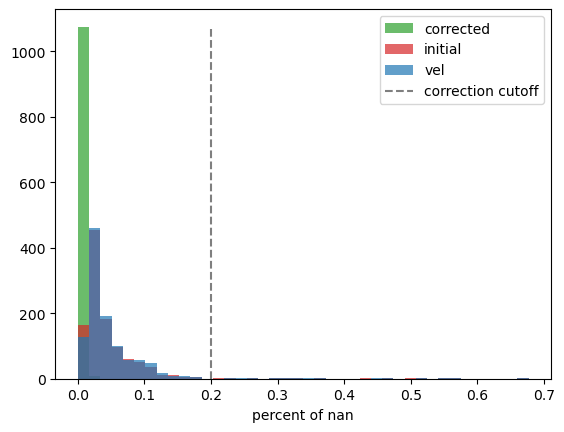

In [16]:
graph_error(sdf)

98.725% of videos were corrected


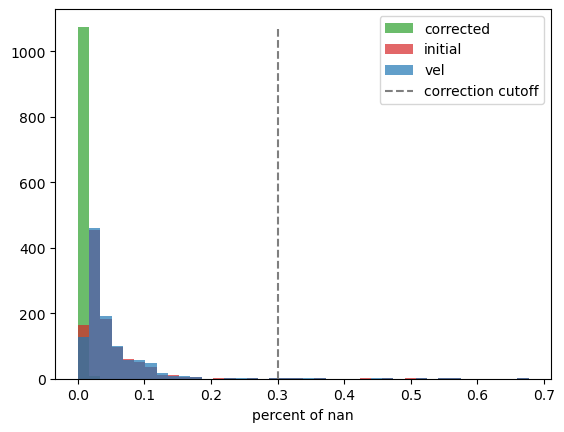

In [7]:
graph_error(sdf)

## multi videos (testing)

In [12]:
pts_df = df[(df['single/multi'] == 'multi') & (df['test/train'] == 'test') & df['pred'] == True]

60.602% of videos were corrected


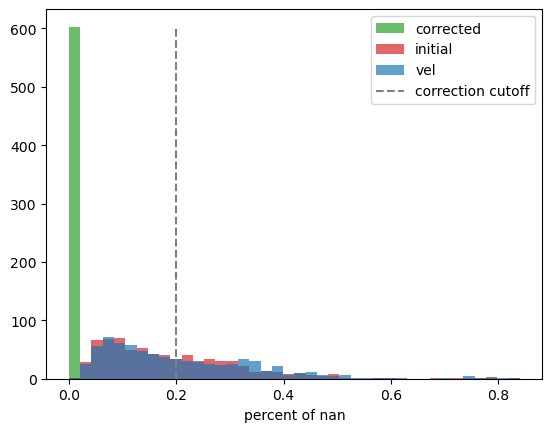

In [17]:
graph_error(pts_df)

82.49% of videos were corrected


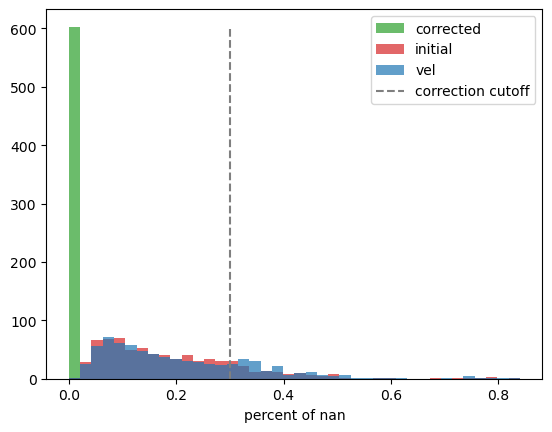

In [9]:
graph_error(pts_df)

44.531% of videos were corrected


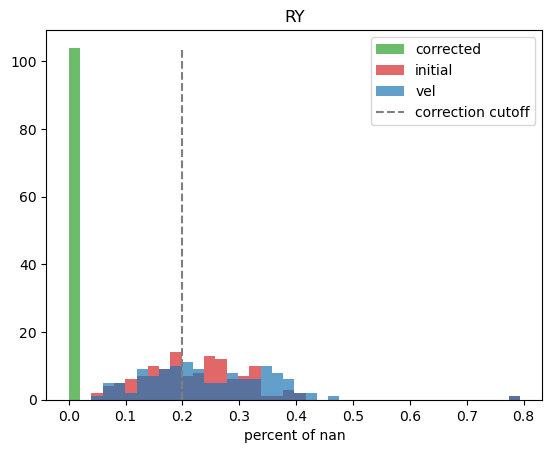

80.473% of videos were corrected


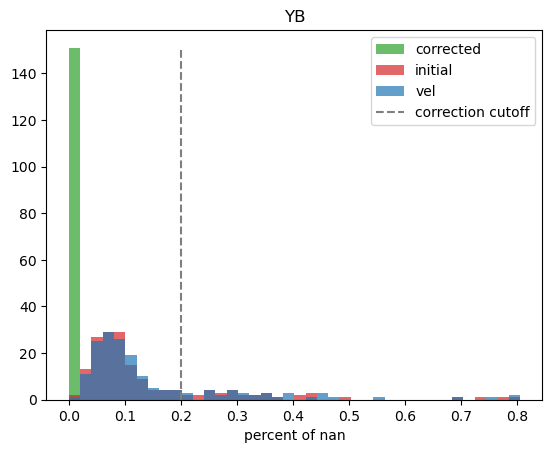

can't find percent of video corrected


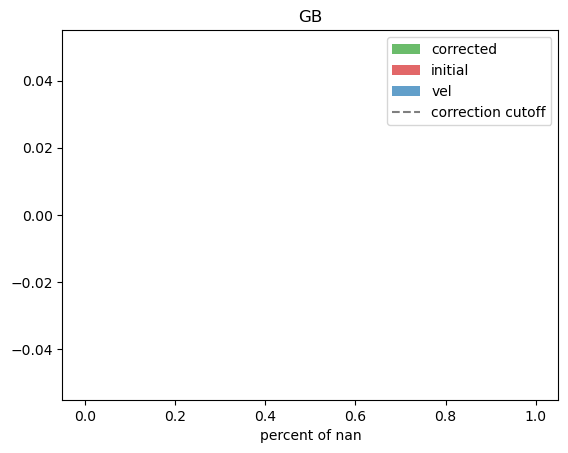

32.37% of videos were corrected


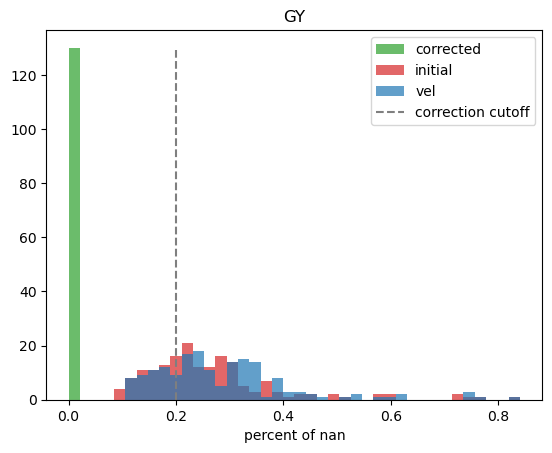

95.96% of videos were corrected


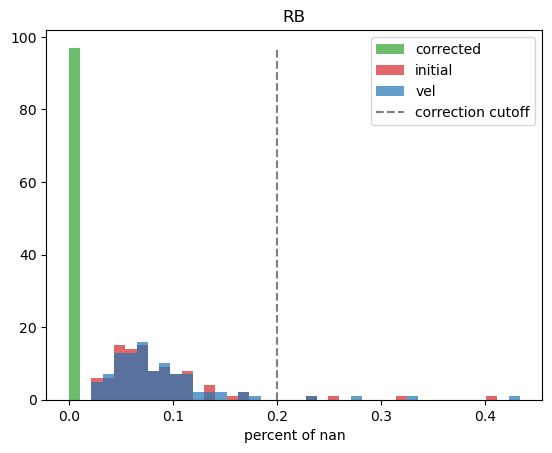

61.111% of videos were corrected


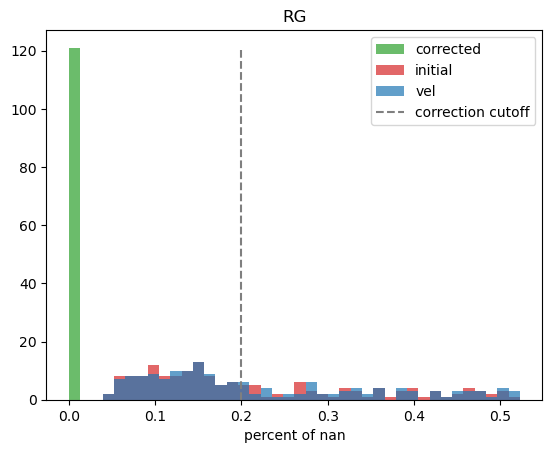

In [18]:
for color_pair in color_pairs:
    if isinstance(color_pair, str) and len(color_pair) == 2:
        c_df = pts_df[(pts_df['color pair'] == color_pair)]
        graph_error(c_df, title=color_pair)

81.25% of videos were corrected


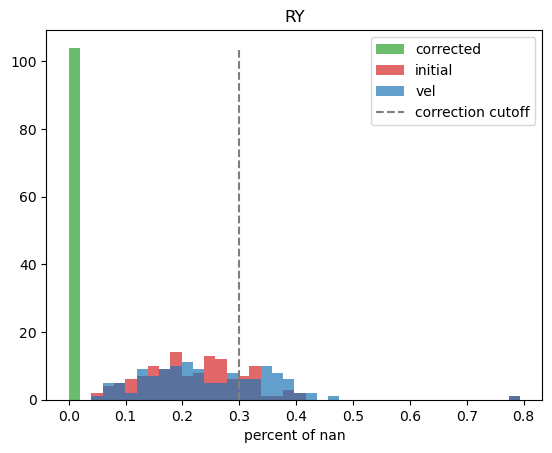

89.349% of videos were corrected


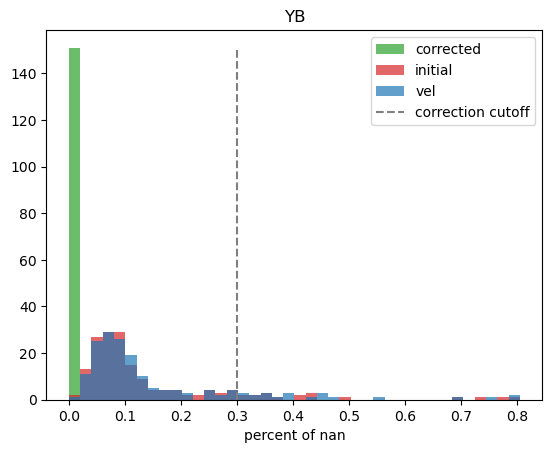

can't find percent of video corrected


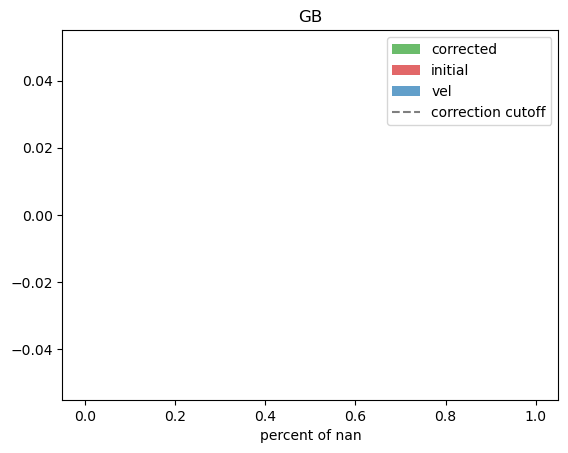

75.145% of videos were corrected


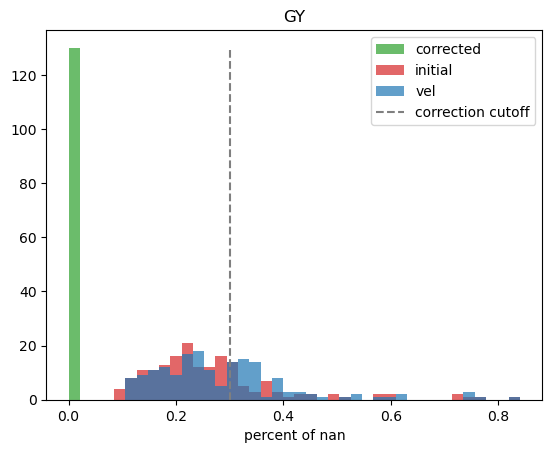

97.98% of videos were corrected


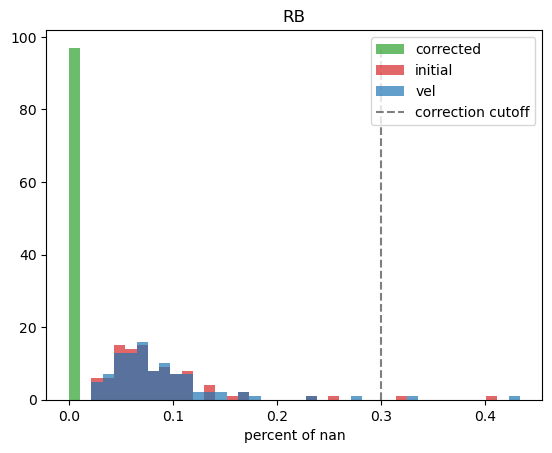

74.691% of videos were corrected


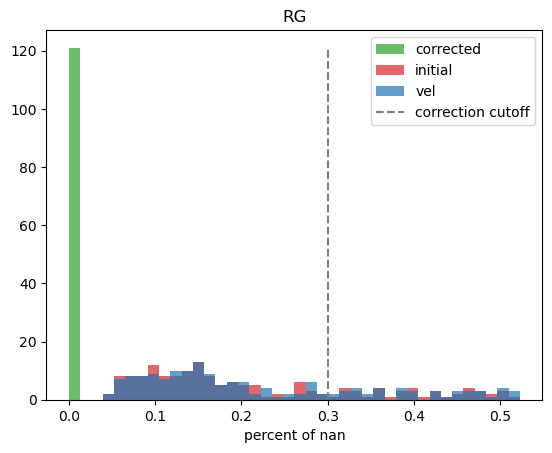

In [10]:
for color_pair in color_pairs:
    if isinstance(color_pair, str) and len(color_pair) == 2:
        c_df = pts_df[(pts_df['color pair'] == color_pair)]
        graph_error(c_df, title=color_pair)

## multi videos (training)

In [11]:
tc_df = df[(df['single/multi'] == 'multi') & (df['test/train'] == 'train') & df['pred'] == True]

75.145% of videos were corrected


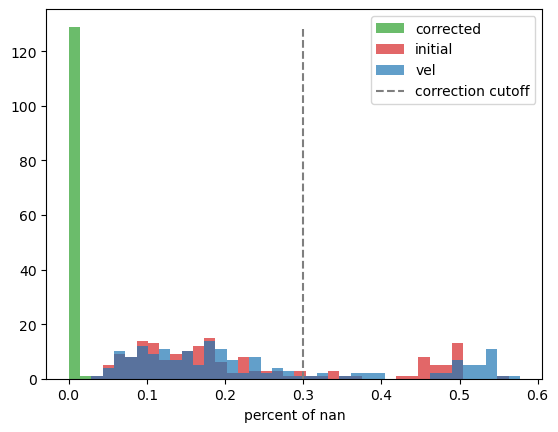

In [12]:
graph_error(tc_df)

100.0% of videos were corrected


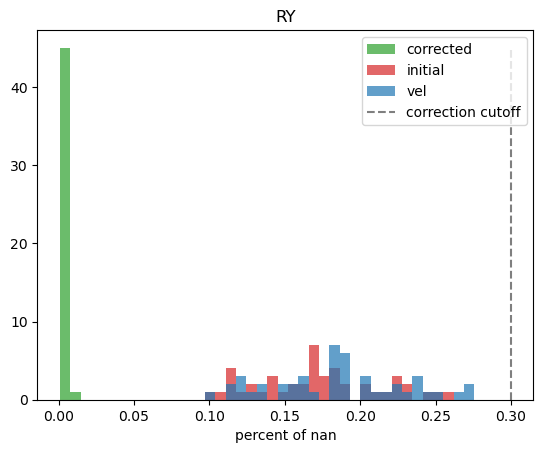

70.69% of videos were corrected


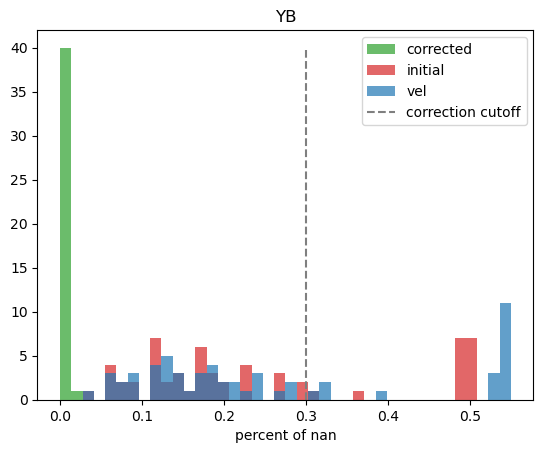

can't find percent of video corrected


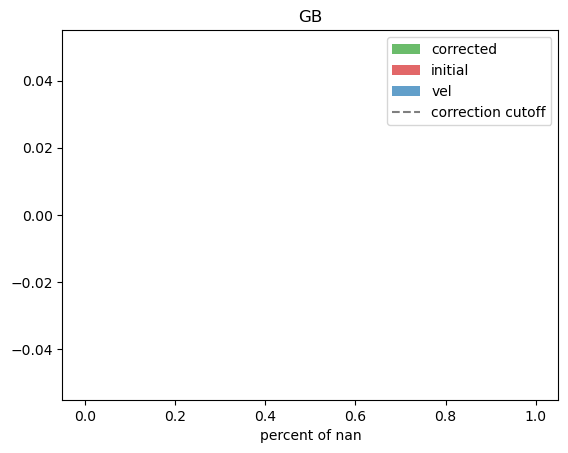

0.0% of videos were corrected


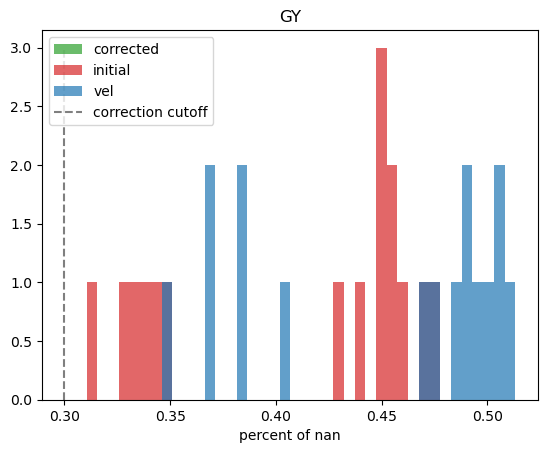

100.0% of videos were corrected


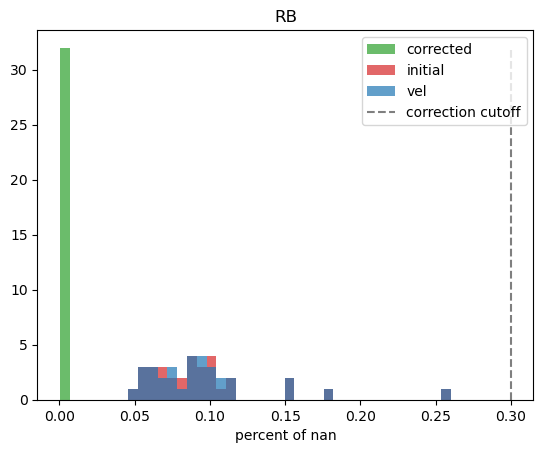

52.381% of videos were corrected


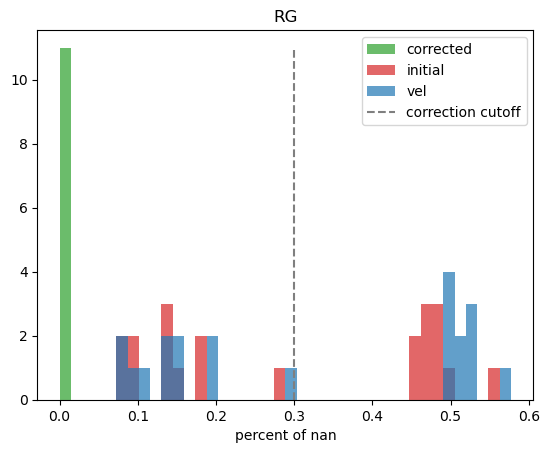

In [13]:
for color_pair in color_pairs:
    if isinstance(color_pair, str) and len(color_pair) == 2:
        c_df = tc_df[(tc_df['color pair'] == color_pair)]
        graph_error(c_df, title=color_pair)